In [2]:
# encoding: utf-8
import pandas as pd
import re
import matplotlib.pylab as plt

filename_1 = 'vrpn_poses.csv'
filename_2 = 'amcl_poses.csv'

outfile = 'date_result.csv'
    
vrpn = pd.read_csv(filename_1)
amcl = pd.read_csv(filename_2)

In [3]:
vrpn.head()
len(vrpn)

116629

In [4]:
amcl.head()
len(amcl)

1156

In [5]:
#数据的筛选，取时间戳前后0.05秒的数据进行求和平均
data = []
for i in range(len(amcl.timestamp)):
    pose_temp = vrpn[(vrpn.timestamp > (amcl.timestamp[i] - 0.01)) & (vrpn.timestamp < (amcl.timestamp[i] + 0.01))]
    entry = pose_temp.mean().values
    columns_index = pose_temp.mean().index
    data.append(entry)
    
vrpn_1 = pd.DataFrame(data, columns = columns_index) 

In [6]:
len(vrpn_1)

1156

In [7]:
amcl.x = amcl.x * (-1) + 3.60421
amcl.y = amcl.y * (-1) + 5.16755

In [8]:
amcl

,timestamp,x,y
0,1.550556e+09,5.989018,7.352084
1,1.550556e+09,6.235210,7.359332
2,1.550556e+09,6.501096,7.347669
3,1.550556e+09,6.644642,7.356626
4,1.550556e+09,6.673572,7.358750
5,1.550556e+09,6.684598,7.358546
6,1.550556e+09,6.699793,7.349830
7,1.550556e+09,6.718909,7.352839
8,1.550556e+09,6.785442,7.270038
9,1.550556e+09,6.834883,7.183717


In [9]:
vrpn_1

,timestamp,x,y
0,NaN,NaN,NaN
1,1.550556e+09,6.015113,7.413339
2,1.550556e+09,6.267369,7.418496
3,NaN,NaN,NaN
4,1.550556e+09,6.438656,7.434921
5,1.550556e+09,6.457409,7.451391
6,1.550556e+09,6.477355,7.462133
7,1.550556e+09,6.509326,7.463800
8,1.550556e+09,6.587008,7.410348
9,1.550556e+09,6.661685,7.328875


In [10]:
distance = ((amcl.x - vrpn_1.x)**2 + (amcl.y - vrpn_1.y)**2)**0.5

In [11]:
vrpn_1.insert(3, 'distance', distance)

In [12]:
vrpn_1

,timestamp,x,y,distance
0,NaN,NaN,NaN,NaN
1,1.550556e+09,6.015113,7.413339,0.226626
2,1.550556e+09,6.267369,7.418496,0.244223
3,NaN,NaN,NaN,NaN
4,1.550556e+09,6.438656,7.434921,0.246956
5,1.550556e+09,6.457409,7.451391,0.245428
6,1.550556e+09,6.477355,7.462133,0.249180
7,1.550556e+09,6.509326,7.463800,0.237144
8,1.550556e+09,6.587008,7.410348,0.243029
9,1.550556e+09,6.661685,7.328875,0.225983


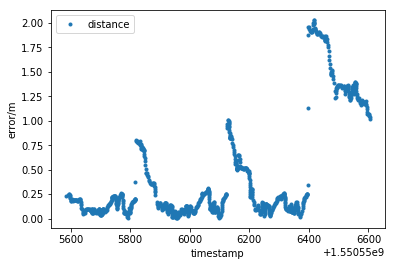

In [15]:
# 画图
plt.plot(vrpn_1.timestamp, vrpn_1.distance, '.')

plt.xlabel('timestamp')
plt.ylabel('error/m')

plt.legend(loc = 'best')
# plt.title('waypoints error')
plt.savefig('./point.png', dpi = 900, bbox_inches = 'tight')

plt.show()